In [1]:
import random
import numpy as np
from scipy.stats import unitary_group

# import circuit, gates
from QuICT.core import Circuit
from QuICT.core.gate import *
from QuICT.core.utils import GateType
from QuICT.simulation.simulator import Simulator
from QuICT.simulation.gpu_simulator import ConstantStateVectorSimulator

# Circuit

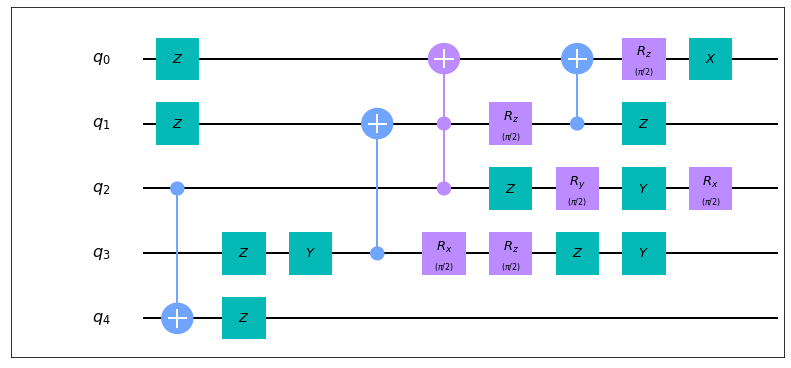

In [2]:
# build circuit with 5 quantum qubits
qubits = 5
cir = Circuit(qubits)

# append gates into circuit
gate_size = 10
typelist = [GateType.rx, GateType.ry, GateType.rz, GateType.x, GateType.y, GateType.z, GateType.cx]
cir.random_append(gate_size, typelist=typelist)
target = random.sample(range(5), 3)
CCX | cir(target)
cir.random_append(gate_size, typelist=typelist)

cir.draw(filename="simulator_circuit")

# Simulator

In [3]:
# Using GPU simulator
gpu_simulator = ConstantStateVectorSimulator(
    precision="double",
    optimize=True,
    gpu_device_id=0,
    sync=True
)

In [4]:
gpu_simulator.run(circuit=cir)

array([ 0.00000000e+00+0.j ,  0.00000000e+00+0.j ,  0.00000000e+00+0.j ,
        0.00000000e+00+0.j ,  0.00000000e+00+0.j ,  0.00000000e+00+0.j ,
        0.00000000e+00+0.j ,  0.00000000e+00+0.j ,  1.28942506e-16+0.5j,
       -0.00000000e+00+0.j , -5.04378831e-17-0.5j, -0.00000000e+00+0.j ,
       -1.95950393e-16-0.5j, -0.00000000e+00+0.j ,  1.17445770e-16+0.5j,
       -0.00000000e+00+0.j ,  0.00000000e+00+0.j ,  0.00000000e+00+0.j ,
        0.00000000e+00+0.j ,  0.00000000e+00+0.j ,  0.00000000e+00+0.j ,
        0.00000000e+00+0.j ,  0.00000000e+00+0.j ,  0.00000000e+00+0.j ,
       -0.00000000e+00+0.j , -0.00000000e+00+0.j , -0.00000000e+00+0.j ,
       -0.00000000e+00+0.j , -0.00000000e+00+0.j , -0.00000000e+00+0.j ,
       -0.00000000e+00+0.j , -0.00000000e+00+0.j ])

In [8]:
# Using simulator with CPU
simulator = Simulator(
    device="CPU",   # [CPU/GPU/qiskit/qcompute]
    backend="statevector",
    shots=10
)

In [9]:
simulator.run(cir, use_previous=False, circuit_out=True, statevector_out=True)

/home/likaiqi/Workplace/test/QuICT/QuICT/simulation/cpu_simulator/cpu.py:211: Warning: Attention! You are using a working-in-process version of circuit simulator!
  warnings.warn(


{'id': '1f77075aa36c11ec93d471343a620809',
 'device': 'CPU',
 'backend': 'statevector',
 'shots': 10,
 'options': {'precision': 'double'},
 'spending_time': 0.006925034523010255,
 'counts': defaultdict(int, {'01010': 2, '01100': 2, '01000': 5, '01110': 1}),
 'output_path': '/home/likaiqi/Workplace/test/QuICT/example/demo/output/1f77075aa36c11ec93d471343a620809'}